# PROJECT ASSIGNMENT I

#### ML MODEL TO PREDICT BIOACTIVITY VALUES OF INHIBITORS OF CORONA VIRUS
 Project By: Rishabh Bhonsle (17217), Prithvi Poddar (17191)

## Aim

The aim of this project is to predict the following with sufficient accuracy:
1.	Bioactivity of a new drug compounds in terms of its inhibition percentage.
2.	QED (quantitative estimation of drug-likeness) Weights as drug likeness is a key consideration when selecting compounds during the early stages of drug discovery.

## Overview

The Coronaviridae are a family of positive single stranded encapsulated viruses. They typically cause mild respiratory diseases, but infections with the ß-coronavirus SARS-CoV, MERS and SARS-CoV-2 can lead to acute respiratory diseases and high mortality, particularly in individuals with underlying health conditions. Multiple interventional clinical trials have been initiated in the search for effective pharmacological treatments against SARS-CoV-2 infection and the related disease Covid-19. Bioinformatics analyses have proposed repurposed drugs based on the interactome between viral encoded proteins and host-cell pathways. In the absence of safe and effective vaccines against SARS-CoV-2, repurposing of existing drugs represents a first pragmatic strategy for the treatment of Covid-19 patients. We thus identify potential inhibitors of SARS-CoV-2 in-vitro cellular toxicity in human (Caco-2) cells by predicting its bioactivity using ML after training the data on a large scale drug repurposing collection (ref_3).
Bioactivity describes the characteristic of an implant material to interact with or initiate a specific reaction of living tissue upon exposure. The biochemical systems encountered by a drug molecule (implant material) are extremely complex. The factors affecting the bioactivity (ref_4) may be divided into three categories:
1.	Physicochemical properties such as solubility, partition coefficients, and ionization.
2.	Chemical structure parameters such as resonance, inductive effect, oxidation potentials, types of bonding, and isosterism.
3.	Spatial considerations such as molecular dimensions, interatomic distances, and stereochemistry.

## Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv('dataset_1.csv')
inhibition = pd.read_csv('inhibition_1.csv')

To identify possible candidates for progression towards clinical studies against SARS-CoV-2, the authors of the paper (ref_1) screened a well-defined collection of compounds. We obtained this data via the data base - ChEMBL_27 SARS-CoV-2 release under the title Identification of inhibitors of SARS-CoV-2 in-vitro cellular toxicity in human (Caco-2) cells using a large scale drug repurposing collection (ref_3). We obtain this data in two parts as follows:
1.	inhibition_1.csv – Data in this data set is used for stating the bioactivity measure which are trained against the corresponding attributes from dataset_1.csv to predict bioactivity values in terms of inhibition percentage for new compounds.
2.	dataset_1.csv – Data in this data set is used for stating factors that affect towards bioactivities as stated previously. The factors selected from the given set of attributes are Molecular Weight, AlogP, PSA, HBA, HBD, CX ApKa, CX BpKa & CX LogD which we shall use as our descriptors. Here we also extract the QED Weighted which are trained against the attributes to predict QED Weighted values for new compounds.

### 1. Visualizing inhibition_1.csv

In [2]:
inhibition.head(5)

Molecule ChEMBL ID             Molecule Name  Molecule Max Phase  \
0      CHEMBL4303167                      None                   0   
1       CHEMBL299879                      None                   0   
2       CHEMBL555654  ADIPHENINE HYDROCHLORIDE                   0   
3       CHEMBL173929                    LUTEIN                   3   
4       CHEMBL435734                ARCTIGENIN                   0   

  Molecular Weight #RO5 Violations AlogP              Compound Key  \
0          1093.33            None  None     CASPOFUNGIN (ACETATE)   
1           471.62               0  4.07                     NTNCB   
2           347.89               0   3.7  ADIPHENINE HYDROCHLORIDE   
3           568.89               2  10.4                    LUTEIN   
4           372.42               0  2.99                Arctigenin   

                                              Smiles Standard Type  \
0  CCC(C)CC(C)CCCCCCCCC(=O)N[C@H]1C[C@@H](O)[C@@H...    Inhibition   
1  O=[N+]([O-])c1ccccc1S(=O)(=O)NC[C@H]1CC[C@H](C...    Inhibition   
2              CCN(CC)CCOC(=O)C(c1ccccc1)c1ccccc1.Cl    Inhibition   
3  CC1=C[C@H](O)CC(C)(C)[C@H]1/C=C/C(C)=C/C=C/C(C...    Inhibition   
4  COc1cc(C[C@H]2C(=O)OC[C@@H]2Cc2ccc(OC)c(OC)c2)...    Inhibition   

  Standard Relation  ...  Target ChEMBL ID Target Name  \
0               '='  ...     CHEMBL4303835  SARS-CoV-2   
1               '='  ...     CHEMBL4303835  SARS-CoV-2   
2               '='  ...     CHEMBL4303835  SARS-CoV-2   
3               '='  ...     CHEMBL4303835  SARS-CoV-2   
4               '='  ...     CHEMBL4303835  SARS-CoV-2   

                                   Target Organism Target Type  \
0  Severe acute respiratory syndrome coronavirus 2    ORGANISM   
1  Severe acute respiratory syndrome coronavirus 2    ORGANISM   
2  Severe acute respiratory syndrome coronavirus 2    ORGANISM   
3  Severe acute respiratory syndrome coronavirus 2    ORGANISM   
4  Severe acute respiratory syndrome coronavirus 2    ORGANISM   

  Document ChEMBL ID Source ID         Source Description Document Journal  \
0      CHEMBL4303101        52  SARS-CoV-2 Screening Data             None   
1      CHEMBL4303101        52  SARS-CoV-2 Screening Data             None   
2      CHEMBL4303101        52  SARS-CoV-2 Screening Data             None   
3      CHEMBL4303101        52  SARS-CoV-2 Screening Data             None   
4      CHEMBL4303101        52  SARS-CoV-2 Screening Data             None   

  Document Year Cell ChEMBL ID  
0          2020  CHEMBL3307519  
1          2020  CHEMBL3307519  
2          2020  CHEMBL3307519  
3          2020  CHEMBL3307519  
4          2020  CHEMBL3307519  

[5 rows x 41 columns]

#### Choosing the relevant values form the inhibition dataset

In [3]:
inhibition = inhibition.loc[:, ['Molecule ChEMBL ID', 'Molecular Weight', 'AlogP', 'Smiles', 'Standard Value']]
inhibition.head(5)

Molecule ChEMBL ID Molecular Weight AlogP  \
0      CHEMBL4303167          1093.33  None   
1       CHEMBL299879           471.62  4.07   
2       CHEMBL555654           347.89   3.7   
3       CHEMBL173929           568.89  10.4   
4       CHEMBL435734           372.42  2.99   

                                              Smiles  Standard Value  
0  CCC(C)CC(C)CCCCCCCCC(=O)N[C@H]1C[C@@H](O)[C@@H...           39.79  
1  O=[N+]([O-])c1ccccc1S(=O)(=O)NC[C@H]1CC[C@H](C...           92.74  
2              CCN(CC)CCOC(=O)C(c1ccccc1)c1ccccc1.Cl            0.38  
3  CC1=C[C@H](O)CC(C)(C)[C@H]1/C=C/C(C)=C/C=C/C(C...           17.37  
4  COc1cc(C[C@H]2C(=O)OC[C@@H]2Cc2ccc(OC)c(OC)c2)...            0.61

#### Removing the duplicate data from the inhibition dataset

In [4]:
to_drop = []
check = []
for i in range(len(inhibition['Smiles'])):
    if (inhibition.at[i, 'Smiles'] == 'None'):
        to_drop.append(i)
    elif (inhibition.at[i, 'Smiles'] in check):
        to_drop.append(i)
    else:
        check.append(inhibition.at[i, 'Smiles'])
        
inhibition.drop(to_drop, inplace = True) 
inhibition.reset_index(inplace=True) 

del check
del to_drop

### 2. Visualizing dataset_1.csv

In [5]:
dataset.head(5)

ChEMBL ID  Name   Synonyms            Type  Max Phase Molecular Weight  \
0    CHEMBL35093  None  PD-172939  Small molecule          0           349.48   
1  CHEMBL3039407  None       None  Small molecule          0           454.97   
2   CHEMBL394875  None       None  Small molecule          0           135.19   
3    CHEMBL55743  None       None  Small molecule          0           207.23   
4   CHEMBL200381  None       None  Small molecule          0           404.84   

   Targets  Bioactivities  AlogP    PSA  ... Structure Type Inorganic Flag  \
0        8              8    3.3  35.58  ...            MOL             -1   
1        1              1   3.89  72.83  ...            MOL             -1   
2        4              4  -0.24  63.32  ...            MOL             -1   
3        4              5   0.82   66.4  ...            MOL             -1   
4      236            486   5.04  86.52  ...            MOL             -1   

  Heavy Atoms HBA Lipinski HBD Lipinski #RO5 Violations (Lipinski)  \
0          26            4            1                          0   
1          31            5            1                          0   
2           8            3            3                          0   
3          15            4            2                          0   
4          29            6            2                          1   

  Molecular Weight (Monoisotopic) Molecular Species Molecular Formula  \
0                        349.2154           NEUTRAL         C22H27N3O   
1                        454.1922           NEUTRAL       C24H32ClFO5   
2                        135.0354        ZWITTERION          C4H9NO2S   
3                        207.0895              ACID         C11H13NO3   
4                        404.0953           NEUTRAL       C21H14ClFN6   

                                              Smiles  
0      Cc1ccc(N2CCN(CC[C@H]3NC(=O)c4ccccc43)CC2)cc1C  
1  CC1(C)O[C@@H]2CC3C4CCC5=CC(=O)CCC5(C)C4(F)C(O)...  
2                                  CSC[C@H](N)C(=O)O  
3                     CC(=O)N[C@@H](Cc1ccccc1)C(=O)O  
4      N#Cc1cnc2cnc(NCc3cccnc3)cc2c1Nc1ccc(F)c(Cl)c1  

[5 rows x 31 columns]

#### Choosing the relevant attributes from the main dataset

In [6]:
dataset = dataset.loc[:, ['ChEMBL ID','Molecular Weight', 'AlogP', 'PSA', 'HBA', 'HBD', 'QED Weighted', 'CX ApKa', 'CX BpKa', 'CX LogD', 'Smiles']]
dataset.head(5)

ChEMBL ID Molecular Weight  AlogP    PSA HBA HBD QED Weighted CX ApKa  \
0    CHEMBL35093           349.48    3.3  35.58   3   1         0.92   13.91   
1  CHEMBL3039407           454.97   3.89  72.83   5   1         0.64    13.6   
2   CHEMBL394875           135.19  -0.24  63.32   3   2         0.56    2.44   
3    CHEMBL55743           207.23   0.82   66.4   2   2         0.77    4.02   
4   CHEMBL200381           404.84   5.04  86.52   6   2         0.48    None   

  CX BpKa CX LogD                                             Smiles  
0    8.02    2.99      Cc1ccc(N2CCN(CC[C@H]3NC(=O)c4ccccc43)CC2)cc1C  
1    None     3.3  CC1(C)O[C@@H]2CC3C4CCC5=CC(=O)CCC5(C)C4(F)C(O)...  
2    9.15   -2.41                                  CSC[C@H](N)C(=O)O  
3    None   -2.25                     CC(=O)N[C@@H](Cc1ccccc1)C(=O)O  
4    4.84    3.53      N#Cc1cnc2cnc(NCc3cccnc3)cc2c1Nc1ccc(F)c(Cl)c1

## Net Data Compilation

### Removing Duplicate Data and Merging our two Datasets

In [7]:
check = []
std_val_inhibition=[]
for i in range(len(inhibition['Smiles'])):
    check.append(inhibition.at[i, 'Smiles'])
    std_val_inhibition.append(inhibition.at[i, 'Standard Value'])

check1 = []
to_drop = []
std_val=[]
for i in range(len(dataset['Smiles'])):
    if (dataset.at[i, 'Smiles'] not in check):
        to_drop.append(i)
    elif (dataset.at[i, 'Smiles'] in check and dataset.at[i, 'Smiles'] not in check1):
        check1.append(dataset.at[i, 'Smiles'])
        std_val.append(std_val_inhibition[check.index(dataset.at[i, 'Smiles'])])
    elif (dataset.at[i, 'Smiles'] in check and dataset.at[i, 'Smiles'] in check1):
        to_drop.append(i)
        
dataset.drop(to_drop, inplace = True)
dataset.reset_index(inplace=True) 

del check
del check1
del to_drop

### Removing Datasets with Incomplete Values

In [8]:
dataset['Standard Value'] = std_val
del dataset['index']

to_drop = []
for i in range(len(dataset['Smiles'])):
    if (dataset.at[i, 'Molecular Weight'] == 'None' or dataset.at[i, 'AlogP'] == 'None' or dataset.at[i, 'PSA'] == 'None' 
        or dataset.at[i, 'HBA'] == 'None' or dataset.at[i, 'HBD'] == 'None' or dataset.at[i, 'QED Weighted'] == 'None' 
        or dataset.at[i, 'CX ApKa'] == 'None' or dataset.at[i, 'CX BpKa'] == 'None' or dataset.at[i, 'CX LogD'] == 'None'):
        to_drop.append(i)
        
dataset.drop(to_drop, inplace = True)
dataset.reset_index(inplace=True)

del to_drop
del dataset['index']

### Rearranging Data for Presentability

In [9]:
final_data = dataset.to_numpy()
f1 = final_data[:, 1:10].astype(np.float64)
f2 = final_data[:, -1].astype(np.float64).reshape((len(final_data),1))
final_data = np.concatenate((f1, f2), axis=1).astype(np.float64)

del f1
del f2

x1 = final_data[:, :5]
x2 = final_data[:, 6:9]
y1 = final_data[:, 5].reshape((len(final_data),1))
y2 = final_data[:, -1].reshape((len(final_data),1))

X = np.concatenate((x1, x2), axis=1)
Y = np.concatenate((y1, y2), axis=1)


features = ['Molecular Weight', 'AlogP', 'PSA', 'HBA', 'HBD', 'CX ApKa', 'CX BpKa', 'CX LogD']
targets = ['QED Weighted', 'Standard Value']

del x1, x2, y1, y2, std_val, i

dataset = np.concatenate((X, Y), axis=1)
dataset = pd.DataFrame(dataset, columns=['Molecular Weight', 'AlogP', 'PSA', 'HBA', 'HBD', 'CX ApKa', 'CX BpKa', 'CX LogD', 'QED Weighted', 'Standard Value'])

### Visualizing the merged data set

Here is a rough overview of our descriptors and targets (via Wiki and ref_5). Here we see the reason as to why the following descriptors are chosen by comparing their definitions to the factors that affect bioactivity of a compound.

Descriptors
1.	Molecular Weight – Measure of the mass of a given molecule
2.	AlogP – Measure of lipophilicity which is a key physicochemical property that plays a crucial role in determining ADMET (absorption, distribution, metabolism, excretion, and toxicity) properties and the overall suitability of drug candidates.
3.	PSA – Measure of the polar surface area (PSA) of a molecule is defined as the surface sum over all polar atoms or molecules, primarily oxygen and nitrogen, also including their attached hydrogen atoms.
4.	HBA – Hydrogen Bond acceptor atoms
5.	HBD – Hydrogen Bond donor atoms
6.	CX ApKa, CX BpKa – Measure of pH
7.	Log D – Measure of the distribution coefficient. It is the ratio of the sum of the concentrations of all forms of the compound (ionized plus un-ionized) in each of the two phases, one essentially always aqueous; as such, it depends on the pH of the aqueous phase, and log D = log P for non-ionizable compounds at any pH.

Targets 
1.	QED Weighted – Measure of drug likeness and  is a key consideration when selecting compounds during the early stages of drug discovery.
2.	Standard Value – Measure of bioactivity of a drug compounds in terms of its inhibition percentage.

In [10]:
dataset.head(5)

Molecular Weight  AlogP     PSA   HBA  HBD  CX ApKa  CX BpKa  CX LogD  \
0            349.48   3.30   35.58   3.0  1.0    13.91     8.02     2.99   
1            135.19  -0.24   63.32   3.0  2.0     2.44     9.15    -2.41   
2            462.98   4.59   70.13   4.0  2.0    12.75     7.12     3.92   
3            528.62   3.74  110.53  10.0  1.0    12.80     8.06     2.45   
4            437.91   0.96  109.58   9.0  2.0     4.87     8.80    -0.44   

   QED Weighted  Standard Value  
0          0.92           54.24  
1          0.56           37.27  
2          0.46           25.05  
3          0.40           88.62  
4          0.65            5.24

### Using Pnadas Profiling to plot the interactions and correlations between the features and the targets

Here we see a brief visualization of our data against the following parameters
1.	Overview – Summary of our dataset
2.	Variables – A brief overview of our descriptors and targets under the heading 
3.	Interactions – An interactive graph to compare trends of targets vs descriptors individually
4.	Correlations – The Pearson's correlation coefficient (r) is a measure of linear correlation between two variables. Its value lies between -1 and +1, -1 indicating total negative linear correlation, 0 indicating no linear correlation and 1 indicating total positive linear correlation.

In [11]:
from pandas_profiling import ProfileReport

profile = ProfileReport(dataset, title="Pandas Profiling Report", html={'style':{'full_width':True}}, 
                       missing_diagrams=None, samples=None, duplicates=None, interactions={'continuous':True})

profile

## Task Definition - ML Implementation

As stated in the paper, it will be key to determine whether any clinical-stage compounds or related molecules could safely achieve active concentrations at the targeted site, human lung epithelia. 

Compounds in our data sets are screened for their inhibition of viral induced cytotoxicity using the human epithelial colorectal adenocarcinoma cell line Caco-2 and a SARS-CoV-2 isolate obtained from an individual originally exposed to the virus in the Wuhan region of China.

We thus to identify inhibitors of SARS-CoV-2 in-vitro cellular toxicity in human (Caco-2) cells using a large scale drug repurposing collection for progression towards clinical studies against SARS-CoV-2 by predicting Percent Inhibition and QED Weighted values of compounds.

### Linear Regression

We will take training and testing as the 80-20 split on our net dataset

In [12]:
num = int(0.8*len(X))

X_train = X[:num, :]
X_test = X[num:, :]
Y_train = Y[:num, :]
Y_test = Y[num:, :]

from sklearn.linear_model import LinearRegression
QED = Y[:,0]
std = Y[:,1]
QED_train = QED[:num]
QED_test = QED[num:]
std_train = std[:num]
std_test = std[num:]

qed_reg = LinearRegression().fit(X_train, QED_train)
std_reg = LinearRegression().fit(X_train, std_train)

Checking the regression score:

In [13]:
print("QED Weighted regularization score: "+str(qed_reg.score(X_train, QED_train)))
print("Standard Value regularization score: "+str(std_reg.score(X_train, std_train)))

QED Weighted regularization score: 0.5361050635235873
Standard Value regularization score: 0.03089728635307787


We can see that QED Weighted is more linearly related to the features than Standard Values. Linear Regression thus seems a good model for QED Weighted Predictions. However, we need to find a different model for our Standard Value data

#### Visualizing Training and Testing Errors

1. Absolute Error in each training data point

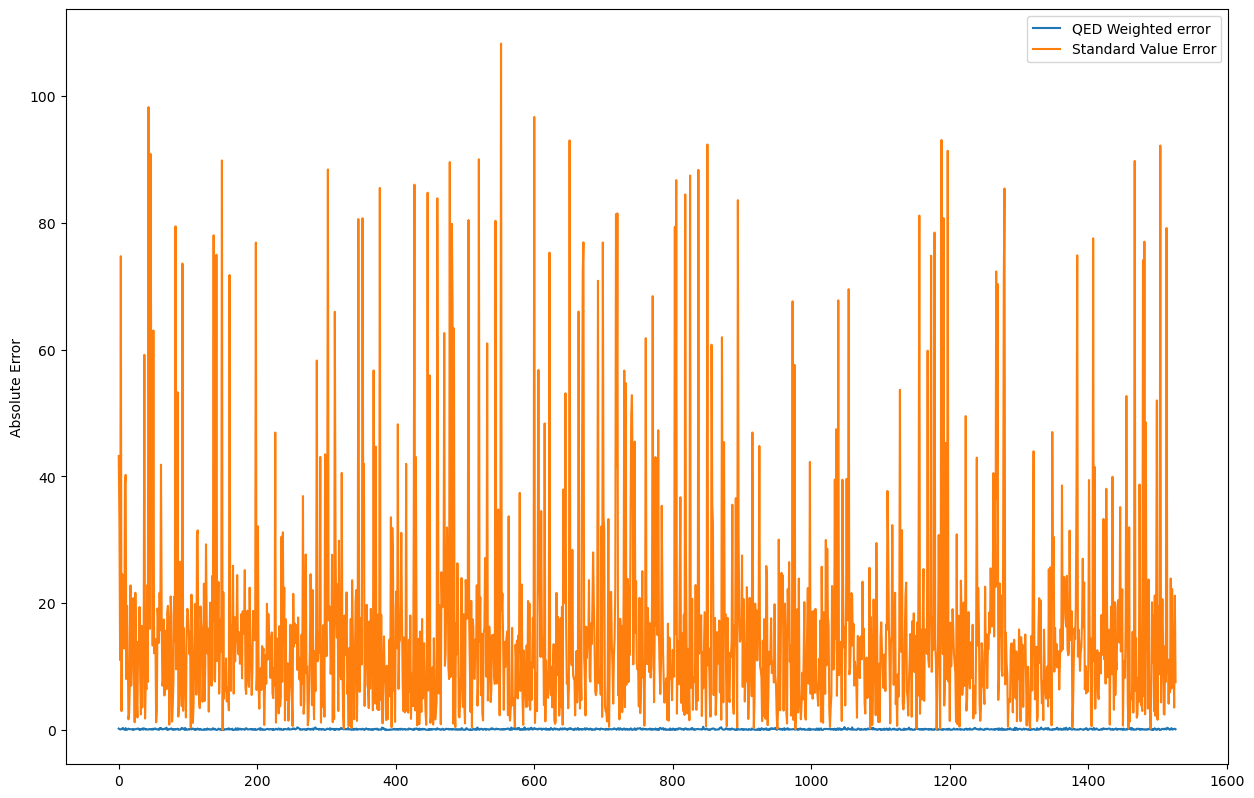

In [15]:
QED_train_pred = qed_reg.predict(X_train)
std_train_pred = std_reg.predict(X_train)
error_qed = []
error_std = []
for i in range(len(QED_train_pred)):
    error_qed.append(np.absolute(Y_train[i,0] - QED_train_pred[i]))
    error_std.append(np.absolute(Y_train[i,1] - std_train_pred[i]))
    
plt.plot(error_qed, label="QED Weighted error")
plt.plot(error_std,label="Standard Value Error")
plt.legend()
plt.ylabel("Absolute Error")
plt.show()
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['figure.dpi'] = 100 

From the above errors we can see that the QED Weighted is a linear function of the input parameters but the Standard Value is not a linear function. We come to this conclusion because the errors for the QED values are very less but the errors for the Standard Values are quite high.

2. Absolute Error in each test data point

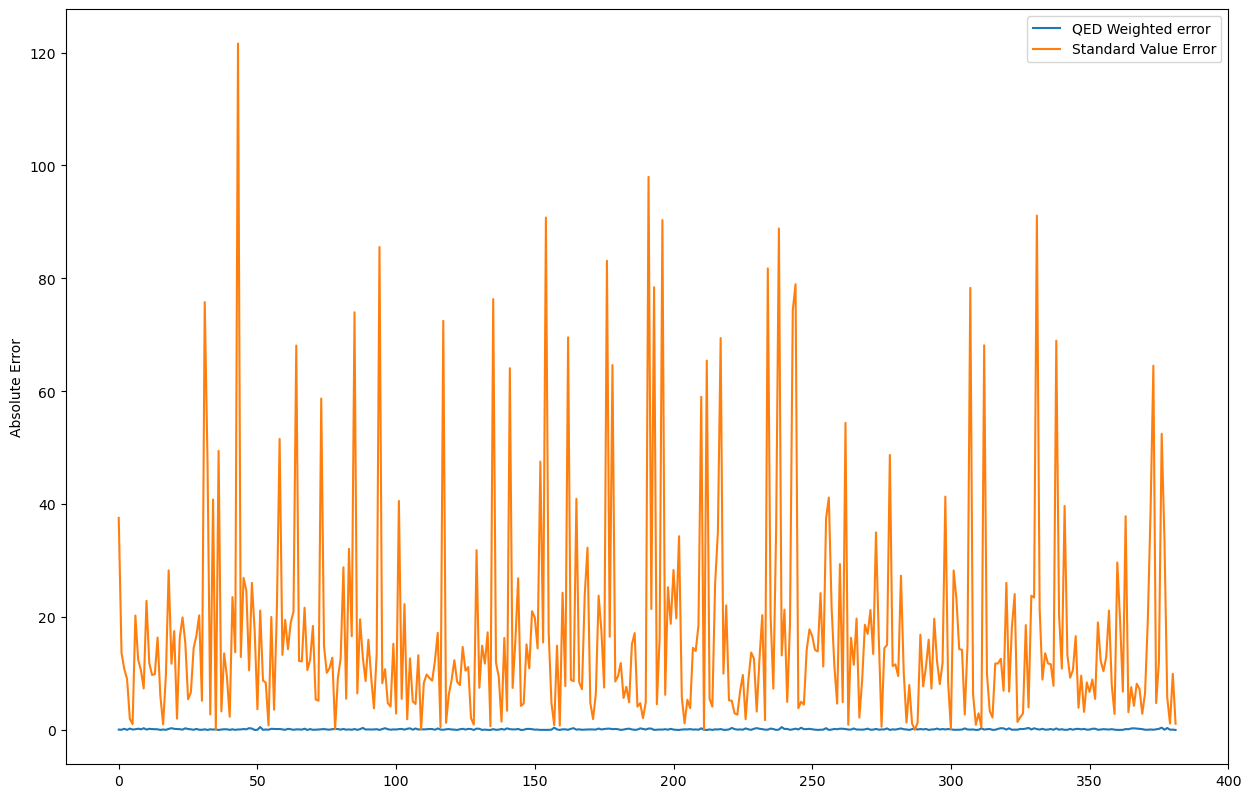

In [16]:
QED_test_pred = qed_reg.predict(X_test)
std_test_pred = std_reg.predict(X_test)
error_qed = []
error_std = []
for i in range(len(QED_test_pred)):
    error_qed.append(np.absolute(Y_test[i,0] - QED_test_pred[i]))
    error_std.append(np.absolute(Y_test[i,1] - std_test_pred[i]))
    
plt.plot(error_qed, label="QED Weighted error")
plt.plot(error_std,label="Standard Value Error")
plt.legend()
plt.ylabel("Absolute Error")
plt.show()
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['figure.dpi'] = 100

Again we see that the QED values are much more accuratley predicted than the Standars Values

#### Root Mean Squared Errors

In [19]:
train_qed_sum = 0
train_std_sum = 0
for i in range(len(QED_train_pred)):
    train_qed_sum += (Y_train[i,0] - QED_train_pred[i])**2
    train_std_sum += (Y_train[i,1] - std_train_pred[i])**2

train_qed_rmse = np.sqrt(train_qed_sum/len(Y_train))
train_std_rmse = np.sqrt(train_std_sum/len(Y_train))

test_qed_sum = 0
test_std_sum = 0
for i in range(len(QED_test_pred)):
    test_qed_sum += (Y_test[i,0] - QED_test_pred[i])**2
    test_std_sum += (Y_test[i,1] - std_test_pred[i])**2
    
test_qed_rmse = np.sqrt(test_qed_sum/len(Y_test))
test_std_rmse = np.sqrt(test_std_sum/len(Y_test))

print("RMSE for QED weighted in training set:    "+str(train_qed_rmse))
print("RMSE for Standard Values in training set: "+str(train_std_rmse))
print("RMSE for QED weighted in test set set:    "+str(test_qed_rmse))
print("RMSE for Standard Values in test set:     "+str(test_std_rmse))

RMSE for QED weighted in training set:    0.1457422561447954
RMSE for Standard Values in training set: 23.646267681886698
RMSE for QED weighted in test set set:    0.15251513968147162
RMSE for Standard Values in test set:     26.642521574238412


### SVM

Here we perform polynomial regression with svm, for both the target features and try to figure out which polynomial curve fits the best

1. Polynomial Regression on QED Weighted values

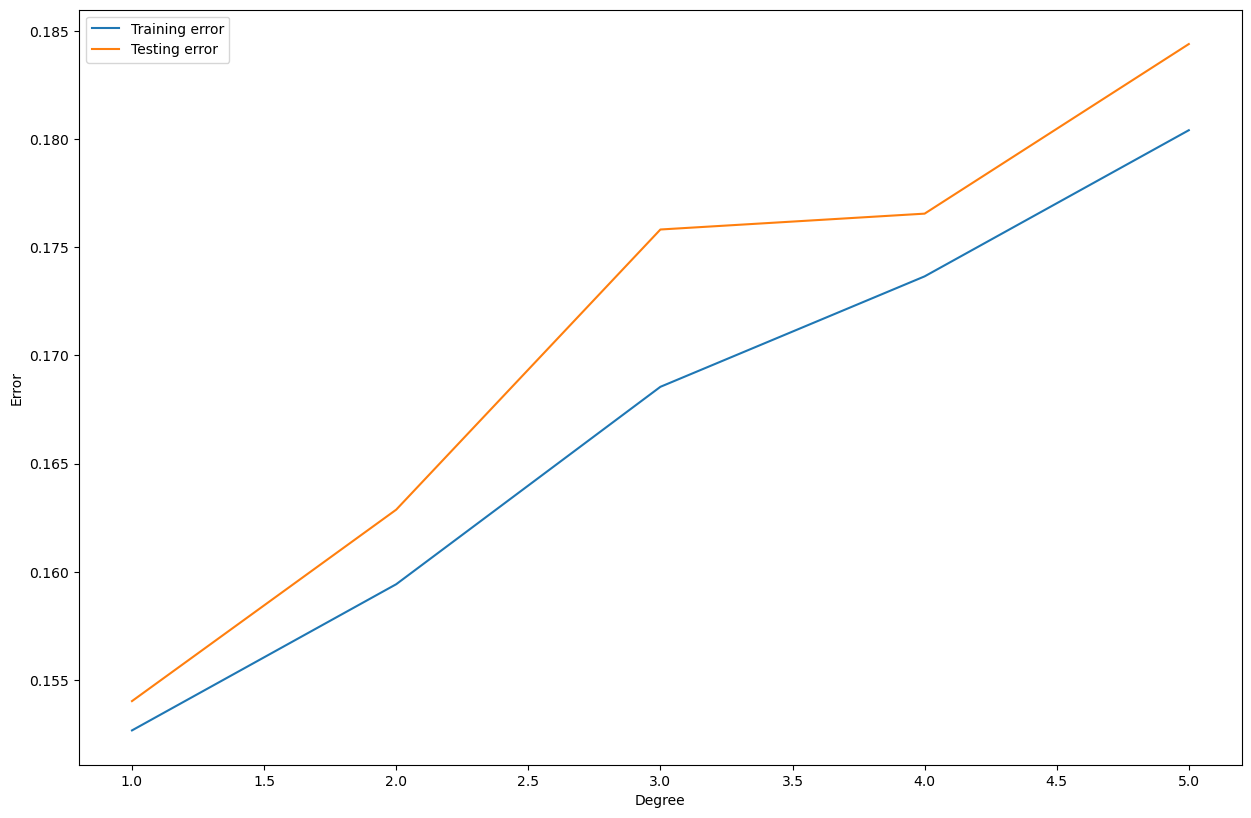

In [31]:
from sklearn import svm
QED = Y[:,0]
std = Y[:,1]
QED_train = QED[:num]
QED_test = QED[num:]
std_train = std[:num]
std_test = std[num:]

qed_train_errors = []
qed_test_errors = []
n = 6
for i in range(1,n):
    QED_regr = svm.SVR(kernel='poly', degree=i)
    QED_regr.fit(X_train, QED_train)
    
    train_qed_sum = 0
    QED_train_pred = QED_regr.predict(X_train)
    for i in range(len(QED_train_pred)):
        train_qed_sum += (Y_train[i,0] - QED_train_pred[i])**2

    train_qed_rmse = np.sqrt(train_qed_sum/len(Y_train))
    
    QED_test_pred = QED_regr.predict(X_test)
    test_qed_sum = 0
    for i in range(len(QED_test_pred)):
        test_qed_sum += (Y_test[i,0] - QED_test_pred[i])**2
        
    test_qed_rmse = np.sqrt(test_qed_sum/len(Y_test))
    
    qed_train_errors.append(train_qed_rmse)
    qed_test_errors.append(test_qed_rmse)
    
plt.plot(np.arange(1,n,1), qed_train_errors, label="Training error")
plt.plot(np.arange(1,n,1), qed_test_errors, label="Testing error")
plt.legend()
plt.ylabel("Error")
plt.xlabel("Degree")
plt.show()
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['figure.dpi'] = 100

#std_regr = svm.SVR()
#std_regr.fit(X_train, std_train)

Here we can see that degree 1 gives the leasr error. Hence the QED Weighted depends linearly with the input parameters. This was confirmed in our linear regression model above as well.

2. Polynomial Regression on standard values

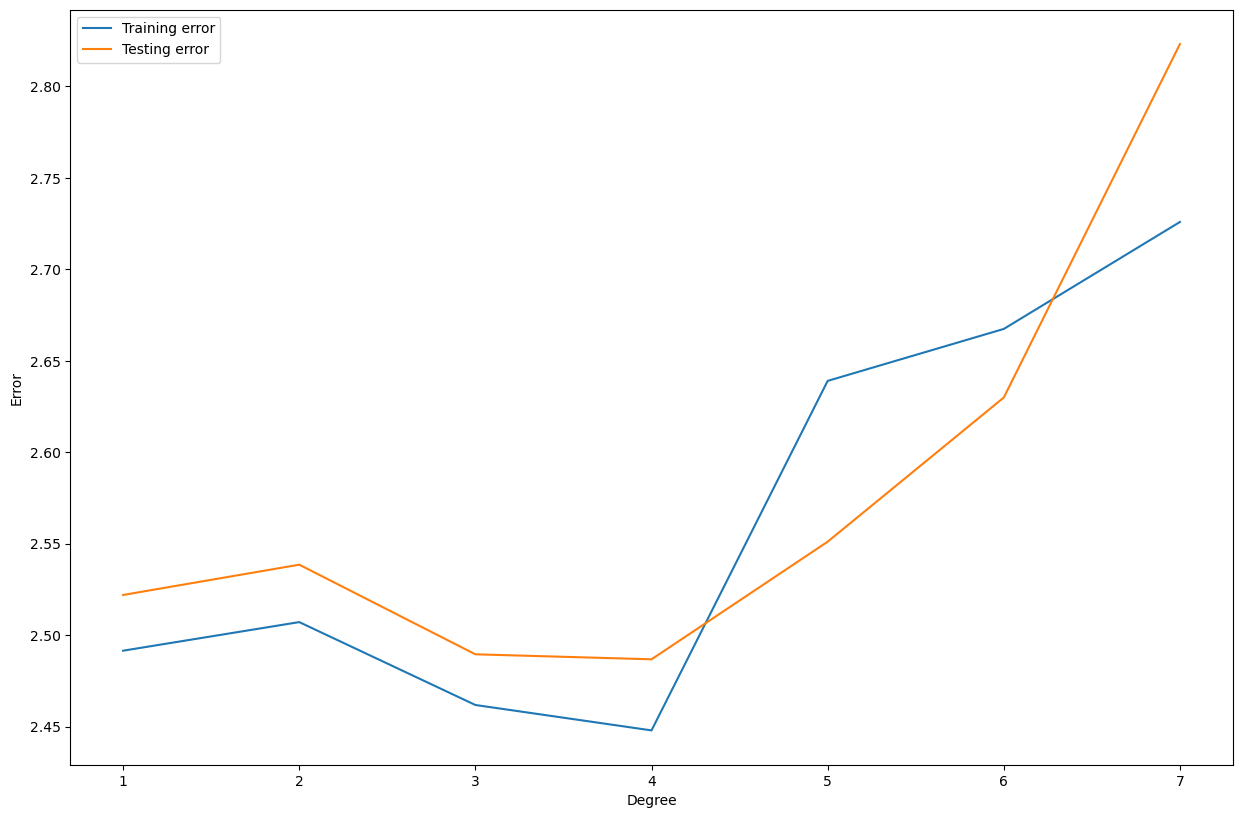

In [32]:
std_train_errors = []
std_test_errors = []
n = 8

for i in range(1,n):
    std_regr = svm.SVR(kernel='poly', degree=i)
    std_regr.fit(X_train, std_train)
    
    train_std_sum = 0
    std_train_pred = std_regr.predict(X_train)
    for i in range(len(std_train_pred)):
        train_std_sum += (Y_train[i,0] - std_train_pred[i])**2

    train_std_rmse = np.sqrt(train_std_sum/len(Y_train))
    
    std_test_pred = std_regr.predict(X_test)
    test_std_sum = 0
    for i in range(len(std_test_pred)):
        test_std_sum += (Y_test[i,0] - std_test_pred[i])**2
        
    test_std_rmse = np.sqrt(test_std_sum/len(Y_test))
    
    std_train_errors.append(train_std_rmse)
    std_test_errors.append(test_std_rmse)
    
plt.plot(np.arange(1,n,1), std_train_errors, label="Training error")
plt.plot(np.arange(1,n,1), std_test_errors,label="Testing error")
plt.legend()
plt.ylabel("Error")
plt.xlabel("Degree")
plt.show()
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['figure.dpi'] = 100

Here we see that degree 4 gives the least error. Although, the standard values are not in any polynomial relation with any of the parameters, for regression purpose, a degree 4 polynomial is the best fit.

#### Root Mean Squared Errors

In [33]:
print("RMSE for QED weighted in training set:    "+str(qed_train_errors[0]))
print("RMSE for Standard Values in training set: "+str(std_train_errors[3]))
print("RMSE for QED weighted in test set set:    "+str(qed_test_errors[0]))
print("RMSE for Standard Values in test set:     "+str(std_test_errors[3]))

RMSE for QED weighted in training set:    0.15267284356929767
RMSE for Standard Values in training set: 2.4478688987176187
RMSE for QED weighted in test set set:    0.15402692332804294
RMSE for Standard Values in test set:     2.486751415809695


We see that the RMSE has significantly reduced for the polynimial regression with degree 4, as compared to linear regression

## Conclusion

Thus we predict Bioactivity values via a degree 4 polynomial regression using SVM whereas QED Weighted values are predicted using linear regression. QED Weighted was expected to be a linear fit as the QED values are infact a measure of the descriptors we considered in some sense.

## References

ref_1 - https://www.researchsquare.com/article/rs-23951/v1

ref_2 - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3524573/

ref_3 - https://www.ebi.ac.uk/chembl/document_report_card/CHEMBL4303101/

ref_4 - https://www.drugtimes.org/how-drugs-act/factors-affecting-bioactivity.html

ref_5 - https://www.researchgate.net/figure/Values-MW-clogP-HBA-HBD-PSA-logBB-and-logP-e-a-for-ML-and-1_tbl1_259626002